## K-Nearest-Neighbour on Crop Yield Prediction

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import regression as reg
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
data = pd.read_csv("apy.csv")
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [5]:
df = data.drop(columns={'District_Name', 'Crop_Year'}, axis=1)
df.dropna(inplace=True)
df = df[df['Area'] < 0.2e+06]
df = df[df['Production'] > 0.019e+09]
df.head()

,State_Name,Season,Crop,Area,Production
5,Andaman and Nicobar Islands,Whole Year,Coconut,18168.00,65100000.0
14,Andaman and Nicobar Islands,Whole Year,Coconut,18190.00,64430000.0
23,Andaman and Nicobar Islands,Whole Year,Coconut,18240.00,67490000.0
32,Andaman and Nicobar Islands,Whole Year,Coconut,18284.74,68580000.0
41,Andaman and Nicobar Islands,Whole Year,Coconut,18394.70,52380000.0


<AxesSubplot:xlabel='Area', ylabel='Production'>

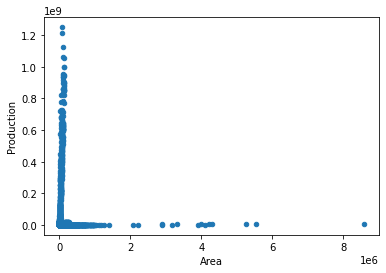

In [6]:
data.plot(kind='scatter', x='Area', y='Production')

<AxesSubplot:xlabel='Area', ylabel='Production'>

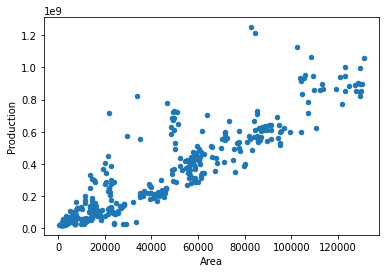

In [7]:
df.plot(kind='scatter', x='Area', y='Production')

In [8]:
df['Range'] = 0

In [9]:
df['Production'].describe()

count    4.340000e+02
mean     2.941372e+08
std      2.763255e+08
min      1.902900e+07
25%      5.702876e+07
50%      2.015000e+08
75%      4.835000e+08
max      1.250800e+09
Name: Production, dtype: float64

In [10]:
for j in range(7):
    df.loc[(df['Production']) >= (j*0.2e+09), 'Range'] = j

In [11]:
df['Range'].value_counts()

0    216
1     78
2     69
3     40
4     25
5      4
6      2
Name: Range, dtype: int64

In [12]:
df.shape

(434, 6)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
states = le.fit_transform(df['State_Name'])

In [15]:
df['State_Name'].value_counts()

Kerala                         238
Andhra Pradesh                  83
Tamil Nadu                      55
Assam                           18
Andaman and Nicobar Islands     14
West Bengal                     13
Goa                              8
Puducherry                       5
Name: State_Name, dtype: int64

In [16]:
states

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [17]:
df['State'] = states

In [18]:
df['State'].value_counts()

4    238
1     83
6     55
2     18
0     14
7     13
3      8
5      5
Name: State, dtype: int64

In [19]:
df.columns

Index(['State_Name', 'Season', 'Crop', 'Area', 'Production', 'Range', 'State'], dtype='object')

In [20]:
df['Area'].value_counts()

3242.00     2
3048.00     2
5036.00     2
2343.00     2
57094.11    1
           ..
58735.00    1
57964.00    1
61034.00    1
62684.00    1
4610.00     1
Name: Area, Length: 430, dtype: int64

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=17)

In [33]:
input = df.drop(columns={'State_Name', 'Season', 'Crop', 'Production', 'Range'}, axis=1)
response = df.drop(columns={'State_Name', 'Season', 'Crop', 'Area', 'Production', 'State'}, axis=1)

In [34]:
input.head(2)

,Area,State
5,18168.0,0
14,18190.0,0


In [35]:
response.head(2)

,Range
5,0
14,0


In [36]:
x_train, x_test, y_train, y_test = train_test_split(input, response)

In [37]:
x_train.shape

(325, 2)

In [38]:
y_train.shape

(325, 1)

In [39]:
clf.fit(x_train, y_train)

C:\Users\NayanPC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=17)

In [40]:
pred = clf.predict(x_test)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        56
           1       0.38      0.36      0.37        14
           2       0.54      0.35      0.42        20
           3       0.41      0.78      0.54         9
           4       0.50      1.00      0.67         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2

    accuracy                           0.70       109
   macro avg       0.39      0.49      0.42       109
weighted avg       0.68      0.70      0.68       109



C:\Users\NayanPC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NayanPC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NayanPC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera